#TensorFlow 2.0


In [ ]:
import numpy as np
import tensorflow as tf

In [ ]:
[1,2,3]#list 생성


[1, 2, 3]

In [ ]:
arr = np.array([1,2,3])

In [ ]:
arr.shape

(3,)

In [ ]:
arr = np.array([1,2,[3,4,5]])

In [ ]:
arr.shape

(3,)

In [ ]:
#tensor에 담을땐 다르다
#tensor생성
tf.constant([1,2,3])#list로 담음

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([1, 2, 3], dtype=int32)>

In [ ]:
tf.constant(((1,2,3),(1,2,3)))#tuple로 담음

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[1, 2, 3],
       [1, 2, 3]], dtype=int32)>

In [ ]:
arr = np.array([1,2,3])
arr

array([1, 2, 3])

In [ ]:
tensor = tf.constant(arr)#이렇게많이 한다
tensor

<tf.Tensor: shape=(3,), dtype=int64, numpy=array([1, 2, 3])>

In [ ]:
tensor.shape

TensorShape([3])

In [ ]:
tensor.dtype

tf.int64

In [ ]:
#data type 정의
tensor = tf.constant([1,2,3],dtype=tf.float32)
tensor

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([1., 2., 3.], dtype=float32)>

In [ ]:
arr = np.array([1,2,3],dtype = np.float32)

In [ ]:
arr.astype(np.uint8)

array([1, 2, 3], dtype=uint8)

In [ ]:
tensor

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([1., 2., 3.], dtype=float32)>

In [ ]:
#tensorflow casting은 이렇게
tf.cast(tensor,dtype=tf.uint8)

<tf.Tensor: shape=(3,), dtype=uint8, numpy=array([1, 2, 3], dtype=uint8)>

In [ ]:
#Tensor에서 numpy추출
tensor.numpy()

array([1., 2., 3.], dtype=float32)

In [ ]:
type(tensor.numpy())

numpy.ndarray

In [ ]:
#난수 생성
np.random.randn(9)#random한 숫자 9개

array([ 1.10966984,  0.69170766,  0.4848923 , -0.2026437 ,  0.46065557,
        2.74448957,  0.7227662 ,  0.46390895, -1.99657462])

In [ ]:
tf.random.normal([3,3])#3by3의 정규

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[ 0.2999098 ,  0.43343657, -1.0955911 ],
       [ 0.1946154 ,  0.545165  ,  0.63392   ],
       [-0.41889948, -0.70071846,  1.0726662 ]], dtype=float32)>

In [ ]:
tf.random.uniform([4,4])#uniform distribution

<tf.Tensor: shape=(4, 4), dtype=float32, numpy=
array([[0.37728953, 0.37847388, 0.61876464, 0.46272027],
       [0.8561286 , 0.06521213, 0.82439196, 0.22279727],
       [0.9223505 , 0.79445696, 0.6047896 , 0.8108139 ],
       [0.8770443 , 0.01062489, 0.8519138 , 0.7419667 ]], dtype=float32)>

In [ ]:
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
#MNIST 불러오기
from tensorflow.keras import datasets

In [ ]:
mnist = datasets.mnist

In [ ]:
(train_x,train_y), (test_x,test_y) = mnist.load_data()
train_x.shape#28x28이 60000개

(60000, 28, 28)

In [ ]:
#dataset 들여다보기
image = train_x[0]
image.shape#컬러아니넹

(28, 28)

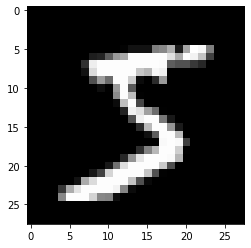

In [ ]:
plt.imshow(image,'gray')
plt.show()

In [ ]:
#channel
#gray scale이라서 1로 channel을 늘려줘야함
expanded_data = np.expand_dims(train_x,-1)#-1은 맨 뒤를 늘린다
expanded_data.shape

(60000, 28, 28, 1)

In [ ]:
new_train_x = tf.expand_dims(train_x,-1)
new_train_x.shape

TensorShape([60000, 28, 28, 1])

In [ ]:
#공홈에서 늘리는건 tf.newaxis
train_x[...,tf.newaxis].shape#맨뒤에 새축 추가

(60000, 28, 28, 1)

In [ ]:
new_train_x = train_x[..., tf.newaxis]
new_train_x.shape

(60000, 28, 28, 1)

(28, 28)


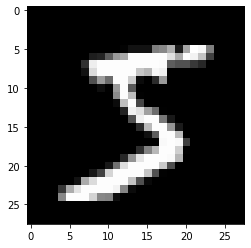

In [ ]:
dis = new_train_x[0]
#plt.imshow(dis,'gray')이러면 오류생김 시각화할 땐 1이 있으면 안됨
disp = new_train_x[0,:,:,0]#요로ㅓㄴ식으로 해야됨
print(disp.shape)
plt.imshow(disp,'gray')
plt.show()

(28, 28)


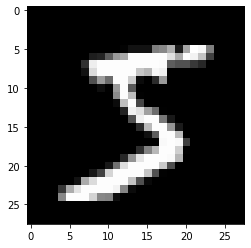

In [ ]:
#아니면 
disp2 = np.squeeze(new_train_x[0])#요렇게도 된다.
print(disp2.shape)
plt.imshow(disp2,'gray')
plt.show()

In [ ]:
train_y.shape

(60000,)

In [ ]:
train_y[0]#train_y는 정답 레이블이다.

5

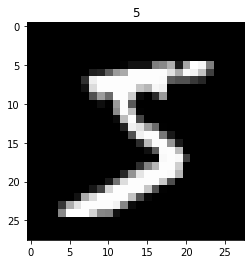

In [ ]:
plt.title(train_y[0])
plt.imshow(train_x[0],'gray')
plt.show()

#OneHot Encoding

컴퓨터가 이해할 수 있는 형태로 변환해서 label을 주는것

In [ ]:
#5라는 클래스라면
[0,0,0,0,0,1,0,0,0,0]

#9라는 클래스라면
[0,0,0,0,0,0,0,0,0,1]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

In [ ]:
#관련 함수
from tensorflow.keras.utils import to_categorical

In [ ]:
to_categorical(1,10)#뒤에가 전체 몇개?

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
#label 확인해서 to_categorical사용
label = train_y[0]
label

5

In [ ]:
label_onehot = to_categorical(label,num_classes=10)
label_onehot

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


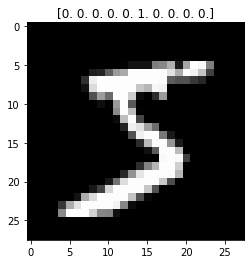

In [ ]:
plt.title(label_onehot)
plt.imshow(train_x[0],'gray')
plt.show()

#layer explanation


In [ ]:
image.shape#항상 image를 확인해볼것

(28, 28)

In [ ]:
#[batch_size, height, width, channel] batch_size는 한번에 학습시킬 데이터의 양을 말한다.
image = image[tf.newaxis, ... , tf.newaxis]
image.shape

(1, 28, 28, 1)

In [ ]:
tf.keras.layers.Conv2D(filters=3,kernel_size=(3,3),strides=(1,1),padding='SAME',activation='relu')
#(3,3)이렇게 튜플로 안주고 3으로 주면 알아서 정사각형으로 만들어준다.

In [ ]:
image = tf.cast(image,dtype = tf.float32)
image.dtype

tf.float32

In [ ]:
layer = tf.keras.layers.Conv2D(5,3,1,padding = 'SAME')
layer

In [ ]:
output = layer(image)
output

<tf.Tensor: shape=(1, 28, 28, 5), dtype=float32, numpy=
array([[[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         ...,
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         ...,
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         ...,
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        ...,

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         ...,
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         ...,
         [0., 0

In [ ]:
np.min(image), np.max(image)

(0.0, 255.0)

In [ ]:
np.min(output), np.max(output)

(-177.98323, 204.2936)

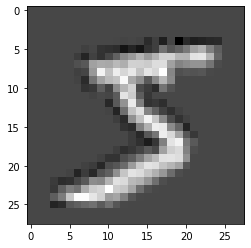

In [ ]:
plt.imshow(output[0,:,:,0],'gray')
plt.show()

In [ ]:
weight = layer.get_weights()#리스트로 받는다
weight[0].shape, weight[1].shape #첫번째는 weight, 두번째는 bias

((3, 3, 1, 5), (5,))

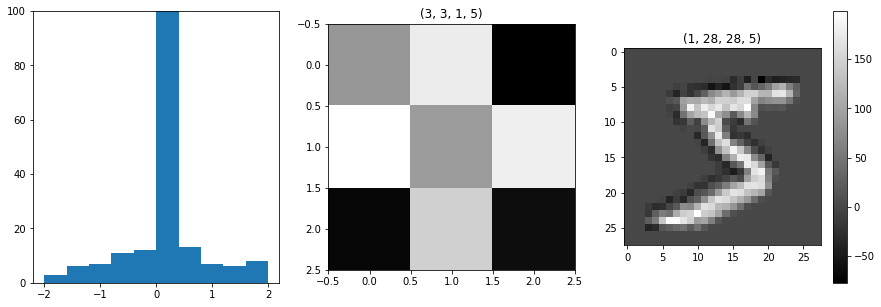

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.hist(output.numpy().ravel(),range=[-2,2])
plt.ylim(0,100)
plt.subplot(132)
plt.title(weight[0].shape)
plt.imshow(weight[0][:,:,0,0],'gray')
plt.subplot(133)
plt.title(output.shape)
plt.imshow(output[0,:,:,0], 'gray')
plt.colorbar()
plt.show()

In [ ]:
tf.keras.layers.ReLU()

In [ ]:
act_layer = tf.keras.layers.ReLU()
act_output = act_layer(output)

In [ ]:
act_output.shape

TensorShape([1, 28, 28, 5])

In [ ]:
act_output

<tf.Tensor: shape=(1, 28, 28, 5), dtype=float32, numpy=
array([[[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         ...,
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         ...,
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         ...,
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        ...,

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         ...,
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         ...,
         [0., 0

In [ ]:
np.min(act_output),np.max(act_output)

(0.0, 204.2936)

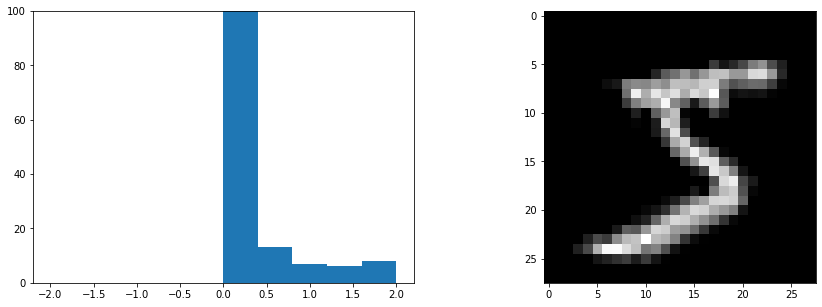

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.hist(act_output.numpy().ravel(),range=[-2,2])
plt.ylim(0,100)

plt.subplot(122)
plt.imshow(act_output[0,:,:,0],'gray')
plt.show()

In [ ]:
pool_layer = tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2), padding ='SAME')
pool_output = pool_layer(act_output)

In [ ]:
pool_output.shape

TensorShape([1, 14, 14, 5])

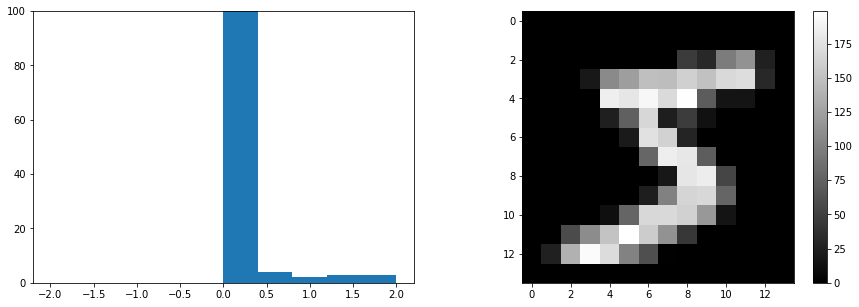

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.hist(pool_output.numpy().ravel(),range=[-2,2])
plt.ylim(0,100)

plt.subplot(122)
plt.imshow(pool_output[0,:,:,0],'gray')
plt.colorbar()
plt.show()

#fully connected

bias node
y = Wx + b(bias node)

In [ ]:
layer = tf.keras.layers.Flatten()
flatten = layer(output)



In [ ]:
output.shape#맨 앞은 batch size

TensorShape([1, 28, 28, 5])

In [ ]:
flatten.shape

TensorShape([1, 3920])

(array([   5.,   31.,   69.,  235., 2962.,  269.,  140.,  115.,   64.,
          30.]),
 array([-177.98323 , -139.75555 , -101.52786 ,  -63.300182,  -25.0725  ,
          13.155182,   51.382866,   89.61055 ,  127.83823 ,  166.06592 ,
         204.2936  ], dtype=float32),
 <a list of 10 Patch objects>)

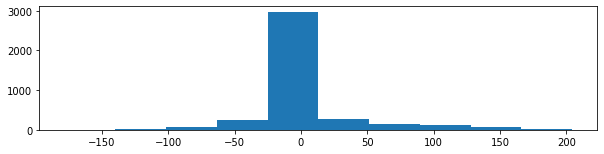

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(211)
plt.hist(flatten.numpy().ravel())


#Dense


In [ ]:
tf.keras.layers.Dense(32,activation = 'relu')#units의 개수, 한 층에 노드를 몇개 만들거임?

In [ ]:
layer = tf.keras.layers.Dense(32,activation = 'relu')

In [ ]:
output = layer(flatten)#flatten으로 길게 늘인걸 dense에 넣는다.

In [ ]:
output.shape

TensorShape([1, 32])

In [ ]:
layer_2  = tf.keras.layers.Dense(10, activation = 'relu')
output_example = layer_2(output)

In [ ]:
output_example.shape

TensorShape([1, 10])

#DropOut

fully connected에서 가지치기하는거

In [ ]:
layer =tf.keras.layers.Dropout(0.7)#랜덤하게 잘라보고하는거
output = layer(output)

In [ ]:
output.shape

TensorShape([1, 32])

#Build Model

한번에


In [ ]:
from tensorflow.keras import layers

In [ ]:
input_shape = (28,28,1)#shape 지정
num_classes = 10#class개수 지정

In [ ]:
inputs = layers.Input(shape = input_shape)
#feature extraction
net = layers.Conv2D(32,3,padding = 'SAME')(inputs)
net = layers.Activation('relu')(net)

net = layers.Conv2D(32,3,padding = 'SAME')(net)
net = layers.Activation('relu')(net)
net = layers.MaxPool2D((2,2))(net)
net = layers.Dropout(0.25)(net)

net = layers.Conv2D(64,3,padding = 'SAME')(net)
net = layers.Activation('relu')(net)

net = layers.Conv2D(64,3,padding = 'SAME')(net)
net = layers.Activation('relu')(net)
net = layers.MaxPool2D((2,2))(net)
net = layers.Dropout(0.25)(net)

#Fullcy Connected
net = layers.Flatten()(net)
net = layers.Dense(512)(net)
net = layers.Activation('relu')(net)
net = layers.Dropout(0.25)(net)
net = layers.Dense(10)(net)
net = layers.Activation('softmax')(net)

model = tf.keras.Model(inputs = inputs, outputs = net, name = 'Basic_CNN')

In [ ]:
model

In [ ]:
model.summary()#아직 batch size는 지정안해줬다.

Model: "Basic_CNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
activation_18 (Activation)   (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
activation_19 (Activation)   (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 14, 14, 32)        0 

#Optimization



1.   loss function
2.   Optimization
3.   Metrics




In [ ]:
loss = 'binary_crossentropy'
loss = 'categorical_crossentropy'

In [ ]:
#onehot endcoing안하면
loss_func = tf.keras.losses.sparse_categorical_crossentropy
#우린 이거로간다

In [ ]:
#onehot 줬을 때
tf.keras.losses.categorical_crossentropy

<function tensorflow.python.keras.losses.categorical_crossentropy>

In [ ]:
#onehot binary일때
tf.keras.losses.binary_crossentropy

<function tensorflow.python.keras.losses.binary_crossentropy>

#Metrics

모델을 평가하는 방법

In [ ]:
#accuracy를 이름으로 넣는 방법
metrics = ['accuracy']

In [ ]:
tf.keras.metrics.Accuracy()
tf.keras.metrics.Precision()
#이런 방법들이 있다

##Compile

In [ ]:
optm =tf.keras.optimizers.Adam()

In [ ]:
model.compile(optimizer = optm, loss = loss_func, metrics = [tf.keras.metrics.Accuracy()])#metrics는 리스트로 주는데 여러가지를 반환해서?

#prepare Dataset

특히 gray scale이면 무적권 늘려야함

In [ ]:
train_x.shape, train_y.shape

((60000, 28, 28), (60000,))

In [ ]:
test_x.shape, test_y.shape

((10000, 28, 28), (10000,))

In [ ]:
np.expand_dims(train_x,-1).shape
#이렇게 할 수돋 있지만

(60000, 28, 28, 1)

In [ ]:
train_x = train_x[..., tf.newaxis]

In [ ]:
test_x = test_x[...,tf.newaxis]

In [ ]:
train_x.shape, test_x.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [ ]:
np.min(train_x), np.max(train_x)#rescaling을 해준다. 0에서 1로

(0, 255)

In [ ]:
train_x = train_x/255
test_x = test_x/255

In [ ]:
np.min(train_x), np.max(train_x)

(0.0, 1.0)

In [ ]:
num_epochs = 1 #책을 n회독같은거
batch_size = 32 #데이터셋을 쪼개서 학습



1.   모델을 쌓고
2.   최적화 과정
3.   compile한다
4.   modelfit을 한다.


In [ ]:
model.fit(train_x,train_y,batch_size=batch_size,shuffle = True, epochs = num_epochs)#shuffle은 섞어서 랜덤으로 학습

ValueError: ignored